In [21]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [22]:
df_labels = pd.read_csv('csvjoinv2/pioro.join.node.csv')
df_features = pd.read_csv('../../network_specs/pioro.specs.csv', sep=';')

#df_features.drop(columns='state', inplace=True)

In [23]:
df_labels['State'] = np.where(
    df_labels['State'] == 'Recovered',
    0,
    1
)

In [24]:
df_labels['State'].value_counts()

0    323970
1        30
Name: State, dtype: int64

In [25]:
df_labels['Id'].value_counts()

12    8100
30    8100
34    8100
1     8100
7     8100
27    8100
3     8100
11    8100
36    8100
13    8100
6     8100
23    8100
28    8100
5     8100
21    8100
8     8100
29    8100
10    8100
22    8100
39    8100
25    8100
9     8100
35    8100
2     8100
18    8100
31    8100
32    8100
37    8100
20    8100
14    8100
19    8100
26    8100
16    8100
38    8100
15    8100
24    8100
17    8100
4     8100
33    8100
0     8100
Name: Id, dtype: int64

In [26]:
df_no_recover_proba = df_labels.groupby('Id')['State'].mean().reset_index(drop=False)
df_no_recover_proba

,Id,State
0,0,0.000000
1,1,0.000000
2,2,0.000988
3,3,0.000000
4,4,0.000000
5,5,0.000000
6,6,0.000000
7,7,0.000494
8,8,0.000000
9,9,0.000000


In [27]:
df_data = df_no_recover_proba.merge(
    df_features,
    on='Id',
    how='left'
)

In [28]:
df_data['binary_state'] = df_data['State'] > 0.0

In [29]:
folder = './jsonDataReport'
roundData = {}

files = os.listdir(folder)
for fname in files:    
        with open(folder+'/'+fname, "r") as f:
            data = json.load(f)  
        node_nneigh = []
        for node_id, node_data in data['0'].items():
            node_data_small = {
                'Id': node_id,
                'nneighWithNodeInfo': node_data['nneighWithNodeInfo']
            }
            node_nneigh.append(node_data_small)
        df_nneigh = pd.DataFrame(node_nneigh)  
        break
        
df_nneigh.head() #nneighWithNodeInfo

,Id,nneighWithNodeInfo
0,22,13
1,23,10
2,24,17
3,25,13
4,26,17


In [30]:
df_data['Id'] = df_data['Id'].astype(str)
df_data = df_data.merge(df_nneigh, on='Id', how='left')

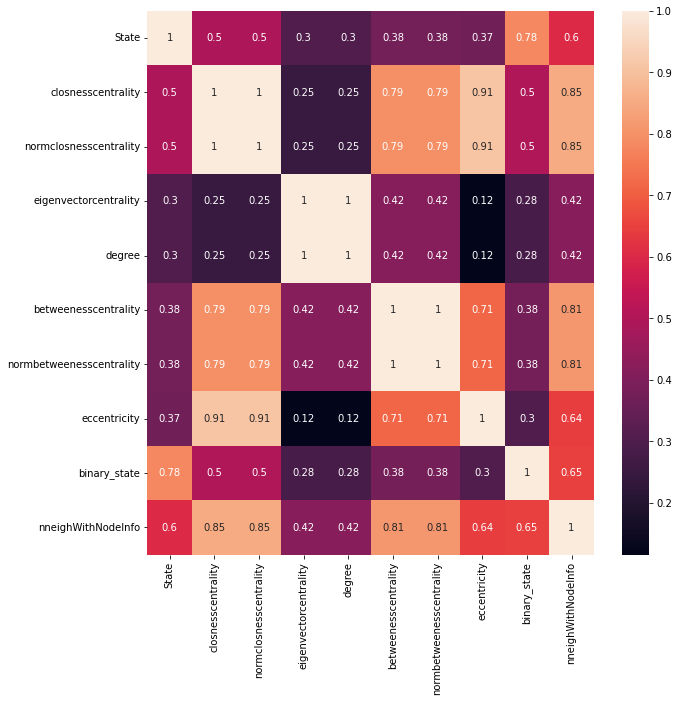

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(df_data.corr()), annot=True)
plt.show()

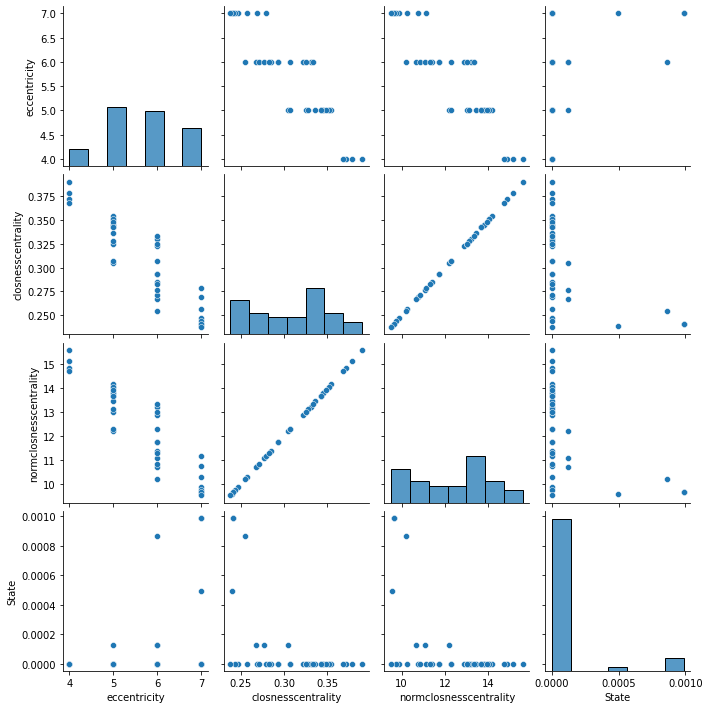

In [32]:
sns.pairplot(
    data=df_data[
        ['eccentricity',
         'closnesscentrality',
         'normclosnesscentrality',
         'State'
        ]
    ]
)

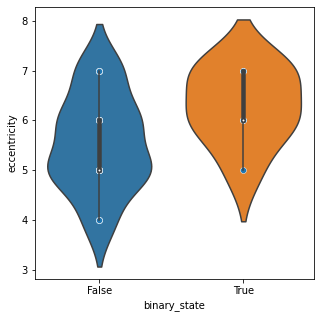

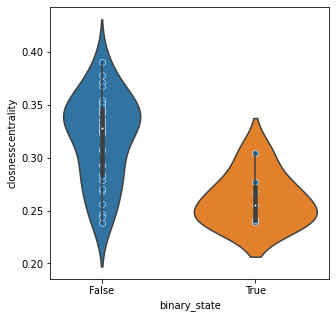

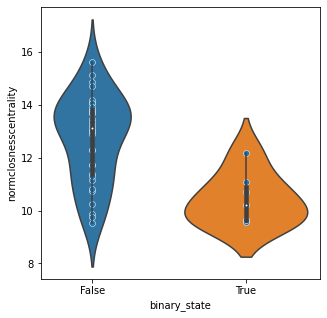

In [33]:
for col in ['eccentricity',
         'closnesscentrality',
         'normclosnesscentrality']:
    plt.figure(figsize=(5,5))
    sns.violinplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    sns.scatterplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    plt.show()

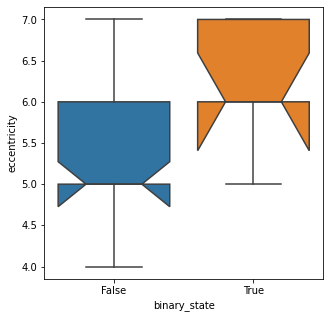

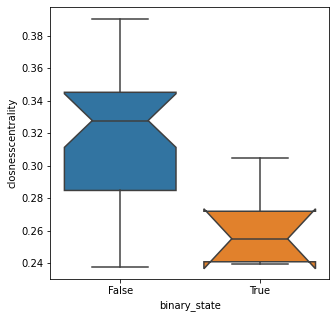

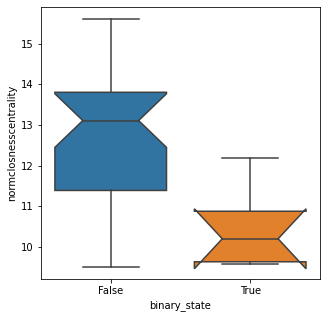

In [34]:
for col in ['eccentricity',
         'closnesscentrality',
         'normclosnesscentrality']:
    plt.figure(figsize=(5,5))
    sns.boxplot(
        data=df_data,
        y=col,
        x='binary_state',
        notch=True
    )
    plt.show()

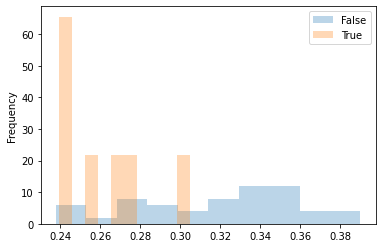

In [35]:
df_data.groupby('binary_state')['closnesscentrality'].plot(kind='hist', alpha=0.3, density=True)
plt.legend(loc='best')

In [36]:
joined_result_folder = '../joined_boxplot'

if not os.path.exists(joined_result_folder):
    os.mkdir(joined_result_folder)
    
df_data.to_pickle(f'{joined_result_folder}/pioroh.pkl')

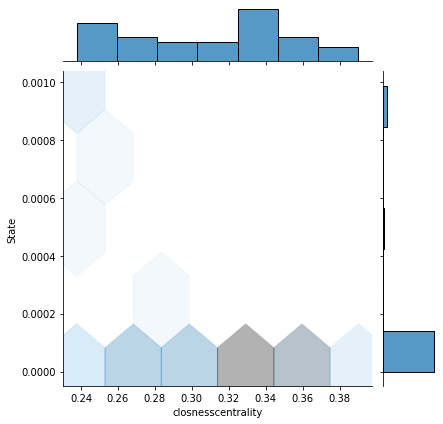

In [37]:
sns.jointplot(
    data=df_data,
    x='closnesscentrality',
    y='State',
   # hue='binary_state',
    alpha=0.3,
    kind="hex"
    #kind="reg",
     #logx=True
)
    

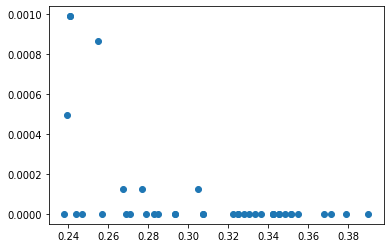

In [34]:
plt.scatter(
    x=df_data['closnesscentrality'],
    y=df_data['State'],
)
#plt.ylim([0, 0.05])